# Klasificēšana ar MNT

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
class_names[y_train[0]]

'Ankle boot'

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [14]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[callback])

Epoch 1/200
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7134 - accuracy: 0.7644 - val_loss: 0.5054 - val_accuracy: 0.8274
Epoch 2/200
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4880 - accuracy: 0.8296 - val_loss: 0.4605 - val_accuracy: 0.8352
Epoch 3/200
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4416 - accuracy: 0.8451 - val_loss: 0.4200 - val_accuracy: 0.8528
Epoch 4/200
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8546 - val_loss: 0.3966 - val_accuracy: 0.8598
Epoch 5/200
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3963 - accuracy: 0.8611 - val_loss: 0.3937 - val_accuracy: 0.8592
Epoch 6/200
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3800 - accuracy: 0.8658 - val_loss: 0.4006 - val_accuracy: 0.8588
Epoch 7/200
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.8693 - val_loss: 0.3750 - val_ac

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

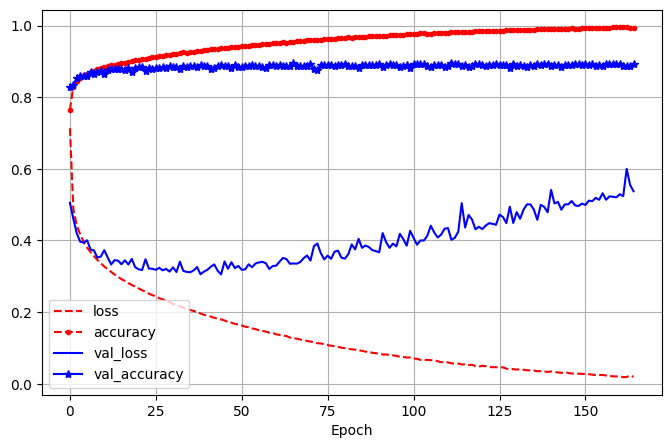

In [16]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.8863


[0.558113157749176, 0.8863000273704529]

In [18]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 76ms/step


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.7, 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ]], dtype=float32)

In [19]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 0])

In [21]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top'],
      dtype='<U11')

In [22]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

# Regresija ar MNT

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(30, activation="relu",
input_shape=X_train.shape[1:]),
tf.keras.layers.Dense(1)
])

In [28]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [30]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[callback])

Epoch 1/200
363/363 [==============================] - 3s 4ms/step - loss: 0.7226 - val_loss: 1.2438
Epoch 2/200
363/363 [==============================] - 2s 5ms/step - loss: 0.4824 - val_loss: 7.6830
Epoch 3/200
363/363 [==============================] - 2s 4ms/step - loss: 0.5704 - val_loss: 7.6530
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4650 - val_loss: 3.4661
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4314 - val_loss: 0.3949
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4064 - val_loss: 0.3757
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4006 - val_loss: 0.3775
Epoch 8/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3948 - val_loss: 0.3944
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3899 - val_loss: 0.3986
Epoch 10/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3862 - val_lo

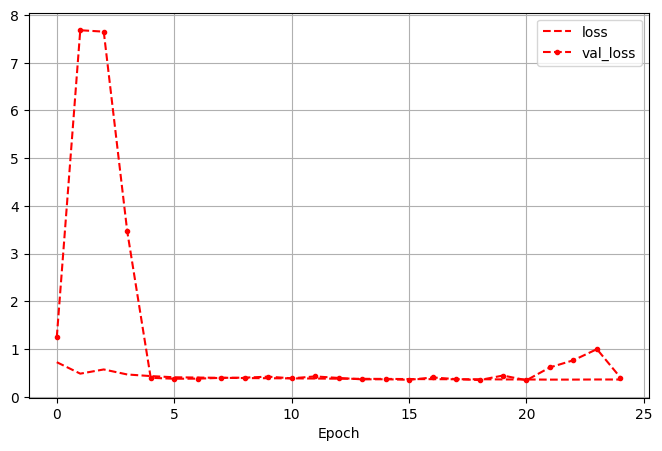

In [33]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--."])
plt.show()

In [32]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.3590


0.3589939475059509

In [34]:
X_new = X_test[:5]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 78ms/step


In [35]:
y_pred

array([[0.60710144],
       [1.5031826 ],
       [4.028887  ],
       [2.431252  ],
       [2.81533   ]], dtype=float32)

In [36]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

# Konvolucionālie neironu tīkli (CNN)

In [37]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [38]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
tf.keras.layers.MaxPooling2D(2),
tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
tf.keras.layers.MaxPooling2D(2),
tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
tf.keras.layers.MaxPooling2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [42]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[callback])

Epoch 1/200
1719/1719 [==============================] - 25s 10ms/step - loss: 0.6752 - accuracy: 0.7641 - val_loss: 0.3477 - val_accuracy: 0.8716
Epoch 2/200
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4005 - accuracy: 0.8635 - val_loss: 0.3018 - val_accuracy: 0.8816
Epoch 3/200
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3430 - accuracy: 0.8839 - val_loss: 0.2948 - val_accuracy: 0.8922
Epoch 4/200
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3049 - accuracy: 0.8954 - val_loss: 0.2813 - val_accuracy: 0.8928
Epoch 5/200
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2852 - accuracy: 0.9025 - val_loss: 0.2493 - val_accuracy: 0.9060
Epoch 6/200
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2658 - accuracy: 0.9079 - val_loss: 0.2521 - val_accuracy: 0.9086
Epoch 7/200
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2518 - accuracy: 0.9133 - val_loss: 0.2612

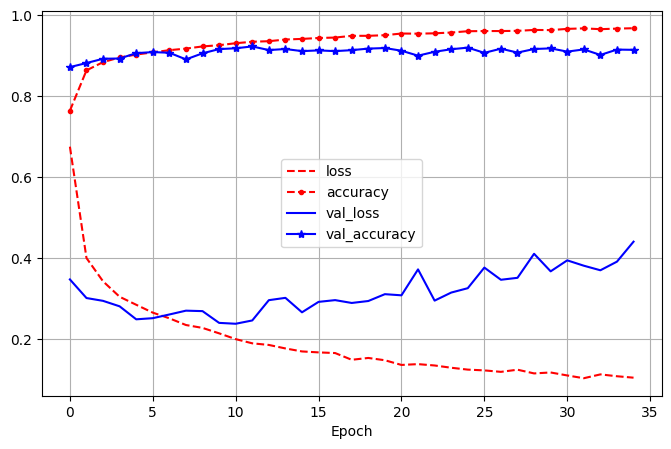

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [44]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.9082


In [45]:
X_new = X_test[:10]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 399ms/step


In [46]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [47]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

# Keras 3.0

In [12]:
!pip install --upgrade keras

In [13]:
import keras
print(keras.__version__)

3.4.1


In [14]:
!pip install --upgrade keras-cv
!pip install --upgrade keras-nlp
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.2 MB/s eta 0:00:00


## Secinājums ar iepriekš sagatavotu klasifikatoru

In [15]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

import json
import math
import numpy as np

import keras
from keras import losses
from keras import ops
from keras import optimizers
from keras.optimizers import schedules
from keras import metrics

import keras_cv

# Import tensorflow for [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) and its preprocessing functions
import tensorflow as tf
import tensorflow_datasets as tfds

In [16]:
classifier = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet_classifier"
)

100%|██████████| 2.80k/2.80k [00:00<00:00, 5.94MB/s]


100%|██████████| 28.0M/28.0M [00:00<00:00, 30.5MB/s]


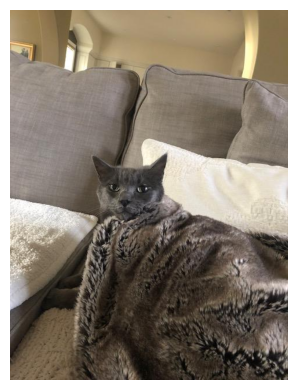

In [17]:
image = keras.utils.load_img('/content/9i63gLN.jpeg')
image = np.array(image)
keras_cv.visualization.plot_image_gallery(
    np.array([image]), rows=1, cols=1, value_range=(0, 255), show=True, scale=4
)

In [18]:
predictions = classifier.predict(np.expand_dims(image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [19]:
top_classes = predictions[0].argsort(axis=-1)

In [20]:
classes = keras.utils.get_file(
    origin="https://gist.githubusercontent.com/LukeWood/62eebcd5c5c4a4d0e0b7845780f76d55/raw/fde63e5e4c09e2fa0a3436680f436bdcb8325aac/ImagenetClassnames.json"
)
with open(classes, "rb") as f:
    classes = json.load(f)

33567/33567 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
top_two = [classes[str(i)] for i in top_classes[-2:]]
print("Top two classes are:", top_two)

Top two classes are: ['Egyptian cat', 'velvet']


## Iepriekš apmācīta klasifikatora precīza noregulēšana

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


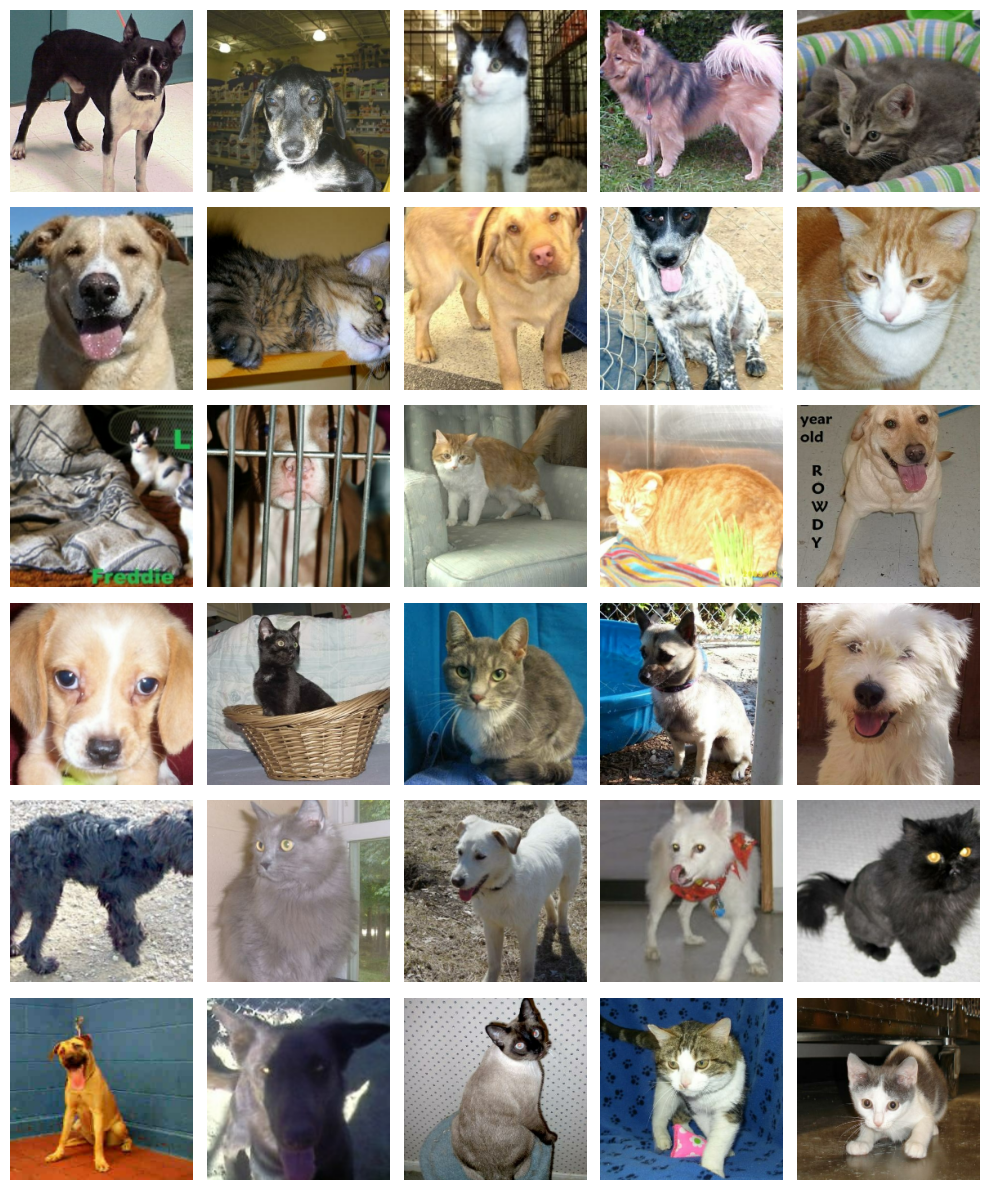

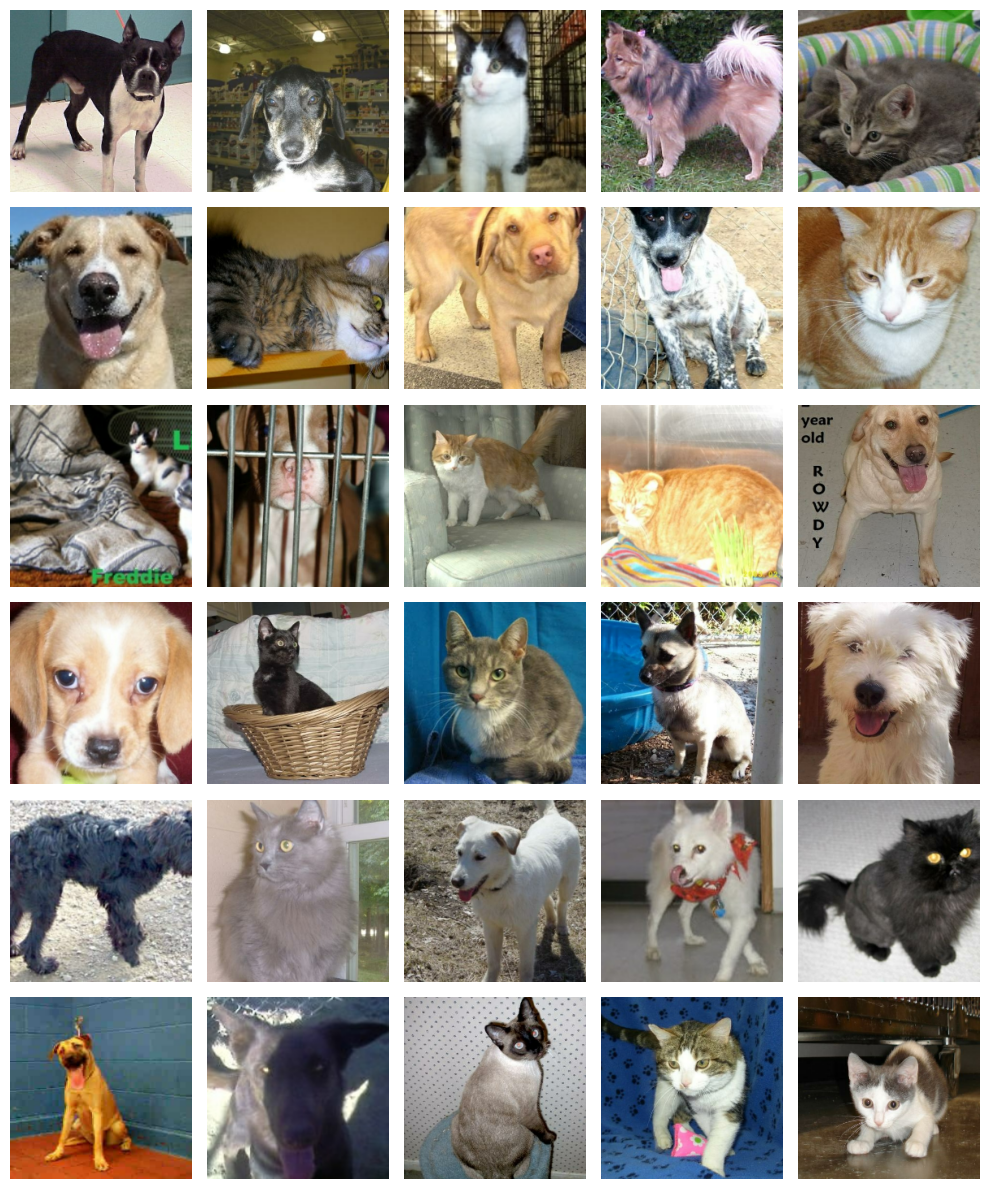

In [22]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE
tfds.disable_progress_bar()

data, dataset_info = tfds.load("cats_vs_dogs", with_info=True, as_supervised=True)
train_steps_per_epoch = dataset_info.splits["train"].num_examples // BATCH_SIZE
train_dataset = data["train"]

num_classes = dataset_info.features["label"].num_classes

resizing = keras_cv.layers.Resizing(
    IMAGE_SIZE[0], IMAGE_SIZE[1], crop_to_aspect_ratio=True
)


def preprocess_inputs(image, label):
    image = tf.cast(image, tf.float32)
    # Staticly resize images as we only iterate the dataset once.
    return resizing(image), tf.one_hot(label, num_classes)


# Shuffle the dataset to increase diversity of batches.
# 10*BATCH_SIZE follows the assumption that bigger machines can handle bigger
# shuffle buffers.
train_dataset = train_dataset.shuffle(
    10 * BATCH_SIZE, reshuffle_each_iteration=True
).map(preprocess_inputs, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)

images = next(iter(train_dataset.take(1)))[0]
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [23]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet", num_classes=2
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

100%|██████████| 1.79k/1.79k [00:00<00:00, 1.62MB/s]


100%|██████████| 23.1M/23.1M [00:01<00:00, 17.9MB/s]


In [ ]:
model.fit(train_dataset)

In [ ]:
predictions = model.predict(np.expand_dims(image, axis=0))

classes = {0: "cat", 1: "dog"}
print("Top class is:", classes[predictions[0].argmax()])

# AutoML

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [1]:
!pip install autokeras

In [4]:
import autokeras as ak
clf = ak.ImageClassifier(max_trials=2)
clf.fit(x_train, y_train, epochs=3, verbose=2)

Trial 2 Complete [00h 43m 05s]
val_loss: 0.25413814187049866

Best val_loss So Far: 0.05027899146080017
Total elapsed time: 00h 43m 37s
Epoch 1/3
1875/1875 - 9s - 5ms/step - accuracy: 0.9515 - loss: 0.1602
Epoch 2/3
1875/1875 - 6s - 3ms/step - accuracy: 0.9772 - loss: 0.0742
Epoch 3/3
1875/1875 - 9s - 5ms/step - accuracy: 0.9813 - loss: 0.0602


In [5]:
test_loss, test_acc = clf.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Test accuracy:  0.9864000082015991


In [6]:
best_model = clf.export_model()
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_to_float32 (CastToFloat32)      │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expand_last_dim (ExpandLastDim)      │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 28, 28, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          92,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification_head_1 (Softmax)      │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,989 (433.55 KB)

 Trainable params: 110,986 (433.54 KB)

 Non-trainable params: 3 (16.00 B)

In [8]:
import tensorflow as tf

predicted_y = best_model.predict(
tf.expand_dims(x_test, -1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
y_pred = predicted_y.argmax(axis=-1)
y_pred[:5]

array([7, 2, 1, 0, 4])

In [11]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)